In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Synthetic Dataset

In order to test my Perceptron for comparison with the scikit-learn implementation, I’m going to first create a dataset. Since I’ll be plotting the intercept, I’m going to put in a dummy feature in the first column, which will be ones. This way the model will learn the weights for the features, as well as the bias term for the intercept.

In [39]:
# setting the random seed to reproduce results
np.random.seed(8)

In [40]:
# number of observations
obs = 1000

In [41]:
# generating synthetic data from multivariate normal distribution  
class_Neg_ones = np.random.multivariate_normal([0,0], [[1.,.95],[.95,1.]], obs)
class_Pos_ones = np.random.multivariate_normal([1,5], [[1.,.85],[.85,1.]], obs)

In [42]:
# vertically stacking the two classes
features = np.vstack((class_Neg_ones, class_Pos_ones)).astype(np.float32)

In [43]:
# creating the labels for the two classes
label_Neg_ones = -(np.ones((obs,1)))
label_Pos_ones = np.ones((obs,1))

In [44]:
# stacking the labels, and then adding them to the dataset
labels = np.vstack((label_Neg_ones,label_Pos_ones))
dataset = np.hstack((features,labels))

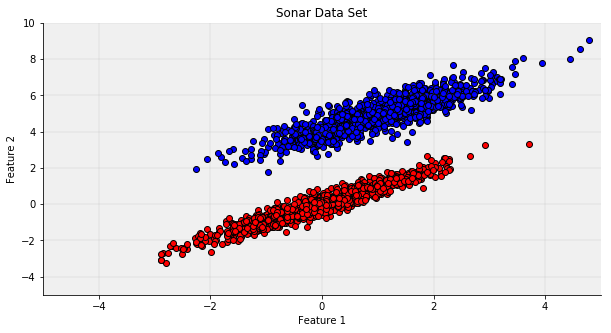

In [49]:
# scatter plot to visualize the two classes (red=1, blue=0)
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(features[:,0][labels[:,0] == 1] , features[:,1][labels[:,0] == 1] ,color='blue',edgecolors='black')
ax.scatter(features[:,0][labels[:,0] == -1], features[:,1][labels[:,0] == -1],color='red' ,edgecolors='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set(xlim=(-5, 5), ylim=(-5, 10), xlabel='Feature 1', ylabel='Feature 2', title='Sonar Data Set')
ax.set_facecolor('#f0f0f0')

In [50]:
print("First 5 row:\n", pd.DataFrame({'Feature 1': features[:, 0], 'Feature 2': features[:, 1]}).head(5), "\n")
print("Last 5 row:\n ", pd.DataFrame({'Feature 1': features[:, 0], 'Feature 2': features[:, 1]}).tail(5), "\n")

First 5 row:
    Feature 1  Feature 2
0  -0.262604   0.082490
1   2.141680   1.703278
2   1.886575   2.648632
3  -2.054672  -1.357531
4  -0.939215  -0.630444 

Last 5 row:
        Feature 1  Feature 2
1995   0.686979   4.287517
1996   0.831789   4.390322
1997   0.658622   5.437698
1998   2.079932   5.426433
1999   0.940717   4.723152 



In [51]:
print("First 5 row:\n", pd.DataFrame({'Label': labels[:,0]}).head(5), "\n")
print("Last 5 row:\n ", pd.DataFrame({'Label': labels[:,0]}).tail(5), "\n")

First 5 row:
    Label
0   -1.0
1   -1.0
2   -1.0
3   -1.0
4   -1.0 

Last 5 row:
        Label
1995    1.0
1996    1.0
1997    1.0
1998    1.0
1999    1.0 



In [52]:
print("First 5 row:\n", pd.DataFrame({'Feature 1': dataset[:, 0], 'Feature 2': dataset[:, 1], 'Label': dataset[:, 2]}).head(5), "\n")
print("Last 5 row:\n ", pd.DataFrame({'Feature 1': dataset[:, 0], 'Feature 2': dataset[:, 1], 'Label': dataset[:, 2]}).tail(5), "\n")

First 5 row:
    Feature 1  Feature 2  Label
0  -0.262604   0.082490   -1.0
1   2.141680   1.703278   -1.0
2   1.886575   2.648632   -1.0
3  -2.054672  -1.357531   -1.0
4  -0.939215  -0.630444   -1.0 

Last 5 row:
        Feature 1  Feature 2  Label
1995   0.686979   4.287517    1.0
1996   0.831789   4.390322    1.0
1997   0.658622   5.437698    1.0
1998   2.079932   5.426433    1.0
1999   0.940717   4.723152    1.0 



## Splitting the Dataset

I didn’t split the data in the NAND example into training and test sets because I was just illustrating a simple example of the Perceptron algorithm. In this example I’m going to randomly sample 70% of the dataset for the training set, and predictions will be made on the remaining 30%. Splitting the dataset into training and test sets is good practice to try and avoid overfitting.

In [53]:
# shuffling the data to make the sampling random
np.random.shuffle(dataset)

In [54]:
# splitting the data into train/test sets
train = dataset[0:int(0.7*(obs*2))]
test  = dataset[int(0.7*(obs*2)):(obs*2)]

In [55]:
# print train
print("train matrix: ", train.shape)
print("First 5 row:\n", pd.DataFrame({'Feature 1': train[:, 0], 'Feature 2': train[:, 1], 'Label': train[:, 2]}).head(5), "\n")
print("Last 5 row:\n ", pd.DataFrame({'Feature 1': train[:, 0], 'Feature 2': train[:, 1], 'Label': train[:, 2]}).tail(5), "\n")

train matrix:  (1400, 3)
First 5 row:
    Feature 1  Feature 2  Label
0   0.987924   1.008760   -1.0
1   1.506920   5.266798    1.0
2   0.228781   0.067208   -1.0
3   0.992854   4.276240    1.0
4  -0.487326  -0.508736   -1.0 

Last 5 row:
        Feature 1  Feature 2  Label
1395   0.651866   1.082109   -1.0
1396   0.419288   0.015721   -1.0
1397   0.203573   3.528323    1.0
1398  -0.101892  -0.608541   -1.0
1399   1.321073   5.704311    1.0 



In [56]:
# print test
print("test matrix: ", test.shape)
print("First 5 row:\n", pd.DataFrame({'Feature 1': test[:, 0], 'Feature 2': test[:, 1], 'Label': test[:, 2]}).head(5), "\n")
print("Last 5 row:\n ", pd.DataFrame({'Feature 1': test[:, 0], 'Feature 2': test[:, 1], 'Label': test[:, 2]}).tail(5), "\n")

test matrix:  (600, 3)
First 5 row:
    Feature 1  Feature 2  Label
0   0.298000  -0.444118   -1.0
1   0.581740   0.862532   -1.0
2   0.272896   0.420539   -1.0
3   0.442959   0.214604   -1.0
4  -1.283661  -1.157259   -1.0 

Last 5 row:
       Feature 1  Feature 2  Label
595  -0.819824  -0.679892   -1.0
596  -2.727313  -2.288828   -1.0
597   0.477716   0.258292   -1.0
598  -0.219998   3.340526    1.0
599   0.150987  -0.330194   -1.0 



# Training the Model


The next step is to train the model to determine the weights.
<pre>
Inputs:
 data:   feature data
 label:  outputs
 learning_rate: learning rate
 max_iter: number of iterations
 </pre>

In [57]:
def perceptron(data, label, max_iter, learning_rate):
    '''
    The perceptron classifier function.

    Args:
    data: train data with shape (m, 3), which means m samples and 
          each sample has 3 features.(1, feature 1, feature 2)
          
    label: train data's label with shape (m,1). 
           1 for digit number 1 and -1 for digit number 5.
           
    max_iter: max iteration numbers
    
    learning_rate: learning rate for weight update

    Returns:
        w: the seperater with shape (1, m). You must initilize it with w = np.zeros((1,d))
    '''
    # Add ones col to feature matrix
    n,m = data.shape
    oneCol = np.ones((n,1))
    data = np.hstack((oneCol,data))
    n,m = data.shape
    
    # Initialize weights vector
    w = np.zeros((1,m)) 
    
    for t in range(max_iter):
        for i, x in enumerate(data):
            a = np.dot(w,data[i]) # (w1)(x1)+(w2)(x2)+...+(wn)(xn)
            prediction = 1.0 if a >= 0.0 else -1.0 # sign(a)
            if(prediction != label[i]):
                w = w + (learning_rate * label[i] * data[i])
    return w

In [58]:
# reshaping the data for the function
train_data = train[:,0:2]
train_label = train[:,2]

test_data = test[:,0:2]
test_label = test[:,2]

max_iter = 20
learning_rate = 0.981

w = perceptron(train_data, train_label, max_iter, learning_rate)
print(w)

[[-5.886      -3.00620356  4.36418285]]


# Test Perceptron

In [59]:
def sign(x):
    return 1 if x > 0 else -1

In [60]:
def accuracy_perceptron(data, label, w):
    # Add ones col to feature matrix
    n,m = data.shape
    oneCol = np.ones((n,1))
    data = np.hstack((oneCol,data))
    n, _ = data.shape
    mistakes = 0
    
    for i in range(n):
        if(sign(np.dot(data[i,:],np.transpose(w))) != label[i]):
            mistakes += 1
    return (n-mistakes)/n

In [61]:
def test_perceptron(train_data, train_label, test_data, test_label, max_iter, learning_rate):
    #train perceptron
    w = perceptron(train_data, train_label, max_iter, learning_rate)
    train_acc = accuracy_perceptron(train_data, train_label, w)
   
    #test perceptron model
    test_acc = accuracy_perceptron(test_data, test_label, w)
    return w, train_acc, test_acc

In [62]:
def test_accuracy(train_data, train_label, test_data, test_label):
    max_iter = [10, 30, 50, 100, 200]
    result_mi = [(0.973,0.948), (0.971, 0.950), (0.980, 0.962), (0.981, 0.959), (0.977, 0.948)]
    learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5]
    result_lr = [(0.981, 0.962), (0.981, 0.962), (0.981, 0.962), (0.981, 0.962), (0.981, 0.962)]
    
    for i, m_iter in enumerate(max_iter):
        _, train_acc, test_acc = test_perceptron(train_data, train_label, test_data, test_label, m_iter, learning_rate[0])
        print("Case %d train accuracy:%f  test accuracy: %f"%(i+1, train_acc, test_acc))
    
    for i, l_rate in enumerate(learning_rate):
        _, train_acc, test_acc = test_perceptron(train_data, train_label, test_data, test_label, max_iter[4], l_rate)
        print("Case %d train accuracy:%f  test accuracy: %f"%(i+6,train_acc, test_acc))
    
    print("accuracy test done!")

In [63]:
test_accuracy(train_data, train_label, test_data, test_label)

Case 1 train accuracy:1.000000  test accuracy: 0.998333
Case 2 train accuracy:1.000000  test accuracy: 0.998333
Case 3 train accuracy:1.000000  test accuracy: 0.998333
Case 4 train accuracy:1.000000  test accuracy: 0.998333
Case 5 train accuracy:1.000000  test accuracy: 0.998333
Case 6 train accuracy:1.000000  test accuracy: 0.998333
Case 7 train accuracy:1.000000  test accuracy: 0.998333
Case 8 train accuracy:1.000000  test accuracy: 0.998333
Case 9 train accuracy:1.000000  test accuracy: 0.998333
Case 10 train accuracy:1.000000  test accuracy: 0.998333
accuracy test done!


# Show Results

In [64]:
def show_result(data, label, w):
    '''
    This function is used for plot the test data with the separators and save it.

    Args:
    data: test features with shape (424, 2). The shape represents total 424 samples and 
          each sample has 2 features.
    label: test data's label with shape (424,1). 
           1 for digit number 1 and -1 for digit number 5.

    Returns:
    Do not return any arguments, just save the image you plot for your report.
    '''
    b  = w[0,0]
    wx = w[0,1]
    wy = w[0,2]
    
    x = np.linspace(-5,5,100)
    y = (-b-(x*wx))/wy
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x, y, '-g')
    ax.scatter(data[:,0][label == 1], data[:,1][label == 1] , color='blue',edgecolors='black')
    ax.scatter(data[:,0][label == -1], data[:,1][label == -1],color='red', edgecolors='black')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.set(xlim=(-5, 5), ylim=(-5, 10), xlabel='Feature 1', ylabel='Feature 2', title='Homework2')
    ax.set_facecolor('#f0f0f0')

In [65]:
def play_with_result(train_data, train_label):
    max_iter = 100
    learning_rate = 0.5
    w = perceptron(train_data, train_label, max_iter, learning_rate)
    show_result(train_data, train_label, w)
    print("play with result done!")

play with result done!


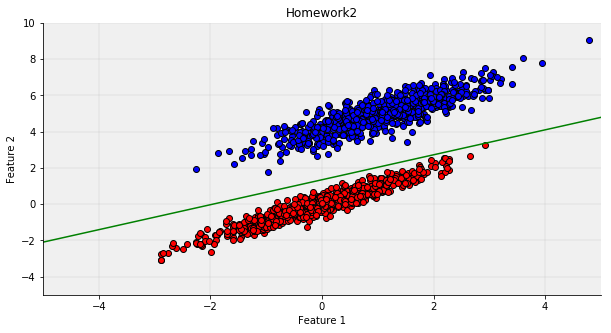

In [66]:
play_with_result(train_data, train_label)